In [1]:
import pandas as pd

import dakar_utils as dakar
from dakar_utils import sparkline2, sparklineStep, moreStyleDriverSplitReportBaseDataframe

In [2]:
import sqlite3

dbname='dakar_sql.sqlite'

conn = sqlite3.connect(dbname)

c = conn.cursor()


In [15]:
from IPython.display import HTML

In [3]:
def _rebaseTimes(times, bib=None):
    if bib is None: return times
    return times - times.loc[bib]

In [4]:
REBASER=306

In [16]:
%%capture
q="SELECT * FROM ranking WHERE VehicleType='car' AND Type='general' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='car' AND Type='general' AND Stage=10 AND Pos<=10)"
tmpq = pd.read_sql(q, conn).fillna(0)
tmpq = tmpq.pivot(index='Bib',columns='Stage',values='GapInS')
tmpq.columns = ['SS_{}_overall'.format(c) for c in tmpq.columns]

tmpq['GapToLeader']= tmpq[[c for c in tmpq.columns ]].values.tolist()
tmpq['GapToLeader'] = tmpq['GapToLeader'].apply(lambda x: [-y for y in x])
tmpq['GapToLeader'] = tmpq['GapToLeader'].apply(sparkline2, typ='bar')

cols = [c for c in tmpq.columns if c.startswith('SS')]
tmpq[cols] = -tmpq[cols].apply(_rebaseTimes,bib=REBASER, axis=0)

tmpq['Gap']= tmpq[cols].values.tolist()
tmpq['Gap'] = tmpq['Gap'].apply(lambda x: [-y for y in x])
tmpq['Gap'] = tmpq['Gap'].apply(sparkline2, typ='bar')

tmpq.head()

In [17]:
tmpq.head()

,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,SS_9_overall,SS_10_overall,GapToLeader,Gap
Bib,,,,,,,,,,,,
301,367.0,-90.0,2279.0,3022.0,2400.0,2263.0,3252.0,2805.0,7357.0,6858.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
302,207.0,116.0,-13554.0,-18533.0,-20808.0,-22217.0,-21501.0,-22456.0,-18339.0,-21898.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
303,247.0,-414.0,1454.0,1685.0,108.0,-5127.0,-4670.0,-5585.0,-1874.0,-2053.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
305,-885.0,-1473.0,-977.0,-3449.0,-5637.0,-6164.0,-6046.0,-7762.0,-4589.0,-5084.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
306,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [6]:
%%capture
q="SELECT * FROM ranking WHERE VehicleType='car' AND Type='general' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='car' AND Type='general' AND Stage=10 AND Pos<=10) "
tmpq3 = pd.read_sql(q, conn)
tmpq3 = tmpq3.pivot(index='Bib',columns='Stage',values='Pos')
tmpq3['Overall']= tmpq3[[c for c in tmpq3.columns ]].values.tolist()
tmpq3['Overall'] = tmpq3['Overall'].apply(lambda x: [-y for y in x])
tmpq3['Overall'] = tmpq3['Overall'].apply(sparklineStep)

In [18]:
tmpq3.head()

Stage,1,2,3,4,5,6,7,8,9,10,Overall
Bib,,,,,,,,,,,
301,1,8,1,1,1,1,1,1,1,1,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
302,6,1,40,30,21,18,14,10,8,9,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
303,3,12,5,4,4,6,6,6,4,4,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
305,44,18,11,11,8,7,7,7,6,6,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
306,13,5,8,6,5,2,4,3,3,3,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [7]:
q="SELECT * FROM ranking WHERE VehicleType='car' AND Type='stage' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='car' AND Type='general' AND Stage=10 AND Pos<=10) "
tmpq2 = pd.read_sql(q, conn).fillna(0)
tmpq2 = tmpq2.pivot(index='Bib',columns='Stage',values='GapInS')
tmpq2.columns = ['SS_{}'.format(c) for c in tmpq2.columns]
tmpq2 = -tmpq2.apply(_rebaseTimes,bib=REBASER, axis=0)
tmpq2.head()

,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8,SS_9,SS_10
Bib,,,,,,,,,,
301,367.0,-457.0,2369.0,743.0,-622.0,-137.0,989.0,-447.0,4552.0,-499.0
302,207.0,-91.0,-13670.0,-4979.0,-2275.0,-1409.0,716.0,-955.0,4117.0,-3559.0
303,247.0,-661.0,1868.0,231.0,-1577.0,-5235.0,457.0,-915.0,3711.0,-179.0
305,-885.0,-588.0,496.0,-2472.0,-2188.0,-1162.0,118.0,-1716.0,3173.0,-495.0
306,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [19]:
tmpq2.head()

,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8,SS_9,SS_10
Bib,,,,,,,,,,
301,367.0,-457.0,2369.0,743.0,-622.0,-137.0,989.0,-447.0,4552.0,-499.0
302,207.0,-91.0,-13670.0,-4979.0,-2275.0,-1409.0,716.0,-955.0,4117.0,-3559.0
303,247.0,-661.0,1868.0,231.0,-1577.0,-5235.0,457.0,-915.0,3711.0,-179.0
305,-885.0,-588.0,496.0,-2472.0,-2188.0,-1162.0,118.0,-1716.0,3173.0,-495.0
306,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [8]:
%%capture
q="SELECT * FROM ranking WHERE VehicleType='car' AND Type='stage' AND Bib IN (SELECT Bib FROM ranking WHERE VehicleType='car' AND Type='general' AND Stage=10 AND Pos<=10) "
tmpq5 = pd.read_sql(q, conn)
tmpq5 = tmpq5.pivot(index='Bib',columns='Stage',values='Pos')
tmpq5['Stage']= tmpq5[[c for c in tmpq5.columns ]].values.tolist()
tmpq5['Stage'] = tmpq5['Stage'].apply(lambda x: [-y for y in x])
tmpq5['Stage'] = tmpq5['Stage'].apply(sparklineStep)


In [21]:
tmpq5.head()

Stage,1,2,3,4,5,6,7,8,9,10,Stage
Bib,,,,,,,,,,,
301,1.0,11.0,2.0,1.0,2.0,2.0,4.0,2.0,1.0,12.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
302,6.0,4.0,68.0,28.0,9.0,8.0,6.0,4.0,3.0,40.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
303,3.0,13.0,3.0,3.0,5.0,14.0,7.0,3.0,4.0,5.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
305,46.0,12.0,9.0,16.0,8.0,7.0,10.0,7.0,7.0,11.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
306,13.0,1.0,11.0,5.0,1.0,1.0,11.0,1.0,18.0,2.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [9]:
q="SELECT Bib, Pos, Crew, Brand FROM ranking WHERE VehicleType='car' AND Type='general' AND Stage=10 AND Pos<=10 "
tmpq4 = pd.read_sql(q, conn).set_index('Bib')
tmpq4

,Pos,Crew,Brand
Bib,,,
301,1,N. AL-ATTIYAH M. BAUMEL TOYOTA GAZOO RACING SA,TOYOTA
307,2,N. ROMA A. HARO BRAVO X-RAID TEAM,MINI
306,3,S. LOEB D. ELENA PH-SPORT,PEUGEOT
303,4,J. PRZYGONSKI T. COLSOUL ORLEN X-RAID TEAM,MINI
308,5,C. DESPRES JP. COTTRET X-RAID MINI JCW TEAM,MINI
305,6,M. PROKOP J. TOMANEK MP-SPORTS,FORD
314,7,Y. AL RAJHI T. GOTTSCHALK X-RAID TEAM,MINI
321,8,B. GARAFULIC F. PALMEIRO X-RAID TEAM,MINI
302,9,G. DE VILLIERS D. VON ZITZEWITZ TOYOTA GAZOO R...,TOYOTA


In [22]:
tmpq4.head()

,Pos,Crew,Brand
Bib,,,
301,1,N. AL-ATTIYAH M. BAUMEL TOYOTA GAZOO RACING SA,TOYOTA
307,2,N. ROMA A. HARO BRAVO X-RAID TEAM,MINI
306,3,S. LOEB D. ELENA PH-SPORT,PEUGEOT
303,4,J. PRZYGONSKI T. COLSOUL ORLEN X-RAID TEAM,MINI
308,5,C. DESPRES JP. COTTRET X-RAID MINI JCW TEAM,MINI


In [10]:
tmpq3.dtypes

Stage
1           int64
2           int64
3           int64
4           int64
5           int64
6           int64
7           int64
8           int64
9           int64
10          int64
Overall    object
dtype: object

In [11]:
results = pd.merge(tmpq4,tmpq3[['Overall']], left_index=True, right_index=True)
results = pd.merge(results,tmpq2, left_index=True, right_index=True)
results = pd.merge(results,tmpq5[['Stage']], left_index=True, right_index=True)
results = pd.merge(results,tmpq, left_index=True, right_index=True)
results.head()
#rb2cTop10.head(3)['test'].apply(sparkline2, typ='bar');

,Pos,Crew,Brand,Overall,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,...,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,SS_9_overall,SS_10_overall,GapToLeader,Gap
Bib,,,,,,,,,,,,,,,,,,,,,
301,1,N. AL-ATTIYAH M. BAUMEL TOYOTA GAZOO RACING SA,TOYOTA,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",367.0,-457.0,2369.0,743.0,-622.0,-137.0,...,2279.0,3022.0,2400.0,2263.0,3252.0,2805.0,7357.0,6858.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
307,2,N. ROMA A. HARO BRAVO X-RAID TEAM,MINI,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",82.0,-8.0,1483.0,214.0,-1444.0,-788.0,...,1557.0,1771.0,327.0,-461.0,973.0,16.0,4270.0,4056.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
306,3,S. LOEB D. ELENA PH-SPORT,PEUGEOT,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
303,4,J. PRZYGONSKI T. COLSOUL ORLEN X-RAID TEAM,MINI,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",247.0,-661.0,1868.0,231.0,-1577.0,-5235.0,...,1454.0,1685.0,108.0,-5127.0,-4670.0,-5585.0,-1874.0,-2053.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
308,5,C. DESPRES JP. COTTRET X-RAID MINI JCW TEAM,MINI,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",102.0,-194.0,891.0,-808.0,-1958.0,-785.0,...,799.0,-9.0,-1967.0,-2486.0,-1549.0,-5322.0,-3156.0,-3265.0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...","<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


In [12]:
dakar.moveColumn(results, 'GapToLeader', right_of='Stage')


In [23]:
s2 = moreStyleDriverSplitReportBaseDataframe(results,'')
display(HTML(s2))

,Pos,Crew,Brand,Overall,SS_1,SS_2,SS_3,SS_4,SS_5,SS_6,SS_7,SS_8,SS_9,SS_10,Stage,GapToLeader,SS_1_overall,SS_2_overall,SS_3_overall,SS_4_overall,SS_5_overall,SS_6_overall,SS_7_overall,SS_8_overall,SS_9_overall,SS_10_overall,Gap
Bib,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,1,N. AL-ATTIYAH M. BAUMEL TOYOTA GAZOO RACING SA,TOYOTA,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAiBJREFUeJzt27uKU1EUxvH/iINMk24I44BYDRKb6WwFa5lKBN/A1hcQn0J8ARttxIcQsbFxkClWbqiE3E8uJ%2BecJMciGDg6mMtKMojfr1tksdlkf2xWcfZemqYpImu6dtUbkH%2BbAiQuCpC4XN/Wwi/ef%2BH8e3Dpb2enxzy5d2vhGq8/Vnj3%2Bdumt/bfK9zM8fzh3Y2stbEA1Wq1TD0cDkmS%2BI%2B%2Bi3pIksQ8uH1j4ZpvPxW5qIecHB5sapvC7Gx%2BP698Pr/WWlu7gZ7dv/yGefrm60rrnBwe8PLRnU1sSbZAM5C4KEDiogCJy8ZmoGWHsP19W7p/lV65GrqBxEUBEhcFSFwUIHFRgMRFARIXBUhcFCBxUYDERQESFwVIXBQgcVGAxGVrXyT%2BzfmPgMevPizVVzjK7WBHsq6dB%2Bjs9Hjp3sJRbqV%2B2b09vUwVD81A4qIAictWA2RmtNttANI0xczodDoATKdTzIxutwvAZDLJ1OPxGDMjCGaPE5Mkwczo9XoAxHGMmdHv9zP1YDAAIIoizIzhcAjAaDTK1GEYYmaEYQjM3kqZGaPRKFNHUQTAYDDAzIjj2Vu3fr%2BfqXu9HmZGkiQABEGAmTEejwHodruYGZPJJFNPp1MAOp0OZsaviaLdbmNm8/%2By1WpRLBbndbPZpFQqzetGo0G5XM7UlUplXtfrdarV6uJDW5FuIHHREC0uuoHERQESFwVIXBQgcfkJX9cHKdz9vd4AAAAASUVORK5CYII%3D"" />",367,-457,2369,743,-622,-137,989,-447,4552,-499,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAsFJREFUeJzt289KG1EUx/GvpVLcuJEgVpCutFgQd9JdoeCuiIsi%2BALFbV%2Bg9CmKL1AoFkrpzheQ0k0pVDSLE//QFhljzL%2BZSSbJdCEJhEq91zszHe357A4eJ/eMP%2B9EuRmJ4zhGqWu6868XoG42DZByogFSTu6mdeHXn76z%2B7N26ddWFqdZX5pJ9PXefj7i49cfVt%2BTxjrSZDtjFvMlFqCTk5Oh2vd9oqj9R1/RC4iiNk8f3EvqpQF4/6VE0QuYLYwZ9ae1jjTZzGg73%2BTk5LXWlNoO9PLJ5cnf2NozvsaHbx7b%2B2Wj3v6NffP8oVH/xtYeRS%2BwWo%2Bp5bkJVhcKV/bZzAd2M6Yx12Vy/R5oe79M0QuMemcLYyzPTRhfe3luwni3slH0AuNQ2MwH9jNmIbUdKCk2u4qN1YWC0S5hy/Y3P635spJYgEyfoaOjYtxv05sXeZkvq3uX60eYyr/cP8Juot1fNdY2d4z65qfGM1hRejRACVtZnDbunZ8at%2BrPIw1QwtaXZm7UPydd6Xsg5UQDpJxogJQTDZByogFSTjRAyokGSDnRACknGiDlRAOknGiAlJNUAyQiVCoVAOI4RkTodDoA9Ho9RIRqtQpAt9sdqjudDmEY0u12AYiiCBGhXq8D0G63EREajcZQ3Ww2AWi1WogIvu8DEIbhUB0EASJCEFycCPR9HxEhDMOhutVqAdBsNhER2u2Lc96NRmOortfriAhRFAFQq9WG5q1Wq4jIYJ5%2B3ev1ADg/P0dE6H/Os1KpICKDe3l2dkapVBrU5XKZg4ODQX16esrh4eGgjqJosHYAz/M4Pj6%2B%2BodmSXcg5WQk6482r23uGJ%2BD6fe9e/E4g5XdLv3zSGnfu8yPc/xv52Vuu8x3IJWNv%2B308/fHefXsUSKvowfKbqmsdm7dgZQT/StMOdEAKScaIOVEA6Sc/AbDWWkabYNKyAAAAABJRU5ErkJggg%3D%3D"" />",,367,-90,2279,3022,2400,2263,3252,2805,7357,6858,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAQVJREFUeJzt2csNgkAURuE7xg0l0AFd0BVF0BVd0AElsBw2EiExJvrPw4vnWxkhgwMn0XFCjDEa8KVb7Q8A3wgIEgKChIAguZe60LIstq5rqcvhoWkaa9s22/h5Awrh%2BXoYzLrufLzvPx9zmt4f38dMdV6OMY/zzj2feTYbx/N7CRfewd0y/hjlK/t0Up2XY8zjLa85nwT4DQQJAUFCQJAQECQEBEmx/4GSqblodLZgLcFfQKkRhYSAanMe8HUDcv5gvLhuQDX9UbyswiAhIEgICBICgoSAICEgSAgIEgKChIAgISBICAgS9sKupvA%2BHAF58aMbtHyFQUJAkBAQJAQECQFBsgHwfkRBTfucngAAAABJRU5ErkJggg%3D%3D"" />"
307,2,N. ROMA A. HARO BRAVO X-RAID TEAM,MINI,"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJAAAAAkCAYAAABmHbPbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAAkRJREFUeJzt2k1rE1EUxvF/xQp10Y2EEgvurFJFunXnRrfFRfEj6Npv4KcQP4IrF%2B66celesNAKJ29gCUmaZibJTF7HhRgYXDSTO8lM0%2Be3O%2BXm9iR5uLkhZyOKogiRBd3KugG53hQgcaIAiRMFSJzcTmujer2e1laSgZ2dnYUel1qAJLkvPxocn7ZW/n8fFu7y/sWDVPbSR1iGjk9bnDWCrNtwohMoY3uFLT4ePc66jYWtPEBJj%2B1Xj%2B7x%2Blkh9X2TWkYfZ42AvcKWa2uZSi1A817CvpnxqxmyX9y%2Bcu3Jucfmps%2B7l09T3TepZfXx5P4dDg92F77A5sHGqn/KePPpOwCf3z6fa%2B3JuTd32PaL23Ptm1Re%2BsijXN%2BBDg925167X9xOtP469pFHuT6BJP/0NV6cKEDiRAESJ

In [14]:
dakar.getTablePNG(s2)

'testpng/testhtml.png'

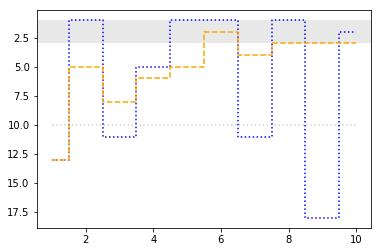

In [331]:
q='''
SELECT o.Bib, o.Stage SS, o.Pos Overall, s.Pos Stage FROM ranking o JOIN ranking s 
ON s.Bib=o.Bib AND s.Stage=o.Stage AND s.Type='stage' AND o.Type='general' AND s.Bib=306
WHERE o.Bib IN (SELECT Bib FROM ranking WHERE VehicleType='car' AND Type='general' AND Stage=10 AND Pos<=10)

'''

data = pd.read_sql(q, conn).set_index('Bib')

fig, ax = plt.subplots(1, 1)

plt.axhspan(1, 3, facecolor='lightgrey', alpha=0.5)
ax.plot(data['SS'], [10]*len(data[['Stage','Overall']]), linestyle=':', color='lightgrey')
ax.step(data['SS'], data['Stage'], where='mid', linestyle=':', color='blue')
ax.step(data['SS'], data['Overall'], where='mid', color='orange', linestyle='--')

plt.gca().invert_yaxis()

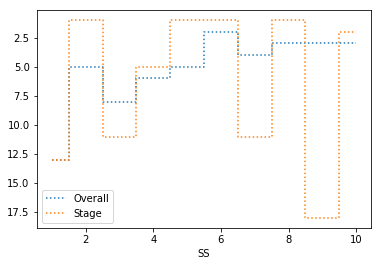

In [238]:
data.plot(x='SS',drawstyle="steps-mid",linestyle=':')
plt.gca().invert_yaxis()

In [232]:
data

,SS,Overall,Stage
Bib,,,
306,1,13,13
306,2,5,1
306,3,8,11
306,4,6,5
306,5,5,1
306,6,2,1
306,7,4,11
306,8,3,1
306,9,3,18
